# Definite Integrals
The definite integral of a function $f(x)$ over an interval $[a,b]$, is the limit
$$\int_{a}^{b}f(x)dx= \lim_{N \rightarrow \infty} \sum_{i=1}^{N} f(x_{i}^{*})(x_{i}-x_{i-1}), x_{i}^{*} \in [x_{i-1}, x_{i}] $$
where, for each $N$, 
$$x_{0}=a<x_{1}<\cdots < x_{N} =b$$
is a partiton of $[a,b]$ with $N$ subintervals and the values $x_{i}^{*} \in [x_{i-1}, x_{i}]$ chosen in each subinterval arbitrary.

The definite integral represents the (net) area under the curve of the graph of $ y=f(x) $ on the interval $[a,b]$.
$$\int_{a}^{b}f(x)dx=\text{(net) area under the curve} \quad y =f(x)  \text{on} [a,b]$$

The ter "net" means that area above the $x$-axis is positive and the area under the $x$-axis coutns as negative area. For example, we can visualize the integral:
$$\int_{\pi/2}^{3\pi/2}\left(\sin(0.2x) + \sin(2x) + 1\right) dx

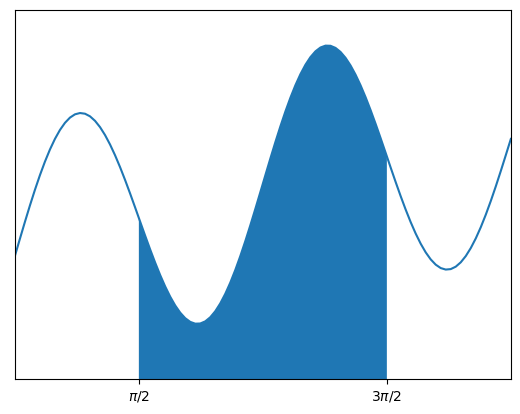

In [1]:
import numpy as np
import matplotlib.pyplot as plt

f = lambda x: np.sin(0.2*x) + np.sin(2*x) + 1

x = np.linspace(0, 2* np.pi, 100)
y = f(x)
plt.plot(x, y)

X = np.linspace(np.pi/2, 3*np.pi/2, 100)
Y = f(X)
plt.fill_between(X, Y)
plt.xticks([np.pi/2, 3*np.pi/2], ['$\pi/2$', '$3\pi/2$']) ; plt.yticks([])
plt.xlim([0, 2*np.pi]); plt.ylim([0,3]);
plt.show()

In our introductory calculus courses, we focus on integrals which we can solve exactly by the Fundamental Theorem of Calculus such as 
$$\int_{0}^{\pi/2} \cos{x}dx = \sin{\pi/2} - \sin{0} = 1$$
However, most definite integrals are impossible to solve exactly. For example, the famous error function in probability $$erf(x) = \frac{2}{\sqrt{\pi}}\int_{0}^{\infty}e^{-t^{2}}dt$$
is a definite integral for which tehre is no explicit formula.

The idea behind numerical integration is to use simple geometric shapes to approximate the area under the curve $y=f(x)$ to setimate definite integrals. In this section, we explore the simplest methods of numerical integration: Riemann sums, the trapezoid rule and Simpson's rule.

## Riemann Sums

In [2]:
import numpy as np
import matplotlib.pyplot as plt

### Definition
A Riemann sum of a function $f(x)$ over a partition $$x_{0}=a<x_{1}<\cdots < x_{N-1} <x_{n} =b$$
is a sum of the form $$\sum_{i=1}^{N}f(x_{i}^{*})(x_{i}-x_{i-1}), x_{i}^{*} \in [x_{i-1}, x_{i}]$$ where each value $x_{i}^{*} \in [x_{i-1},x_{i}]$ in each subinterval is arbitrary.

Riemann sums are important because they provide an easy way to approximate a definite integral $$\int_{a}^{b}f(x)dx \approx \sum_{i=1}^{N} f(x_{i}^{*})(x_{i}-x_{i-1}), x_{i}^{*} \in [x_{i-1},x_{i}]$$

Notice that the product $f(x_{i}^{*})(x_{i}-x_{i-1})$ for each i is the area of a rectangle of height $f(x_{i}^{*})$ and width $x_{i}-x_{i-1}$. We can think of a Riemann sum as the area of
$N$ rectangles with heights determined by the graph of $y=f(x)$.

The value $x_{i}^{*}$ chosen in each subinterval is arbitrary however there are certain obvious choices:
* A *left* Riemann sum is when each $x_{i}^{*}=x_{i-1}$ is the left endpoint of the subinterval $[x_{i-1},x_{i}]$
* A *right* Riemann sum is when each $x_{i}^{*}=x_{i}$ is the right endpoint of the subinterval $[x_{i-1},x_{i}]$
* A *midpoint* Riemann sum is when each $x_{i}^{*}=\left(x_{i-1}+x_{i}\right)/2$ is the left endpoint of the subinterval $[x_{i-1},x_{i}]$


Let's visualize rectangles in the left, right and midpoint Riemann sums for the function $$f(x)=\frac{1}{1+x^{2}}$$ over the interval $[0,5]$ with a partition of size $N=10$.

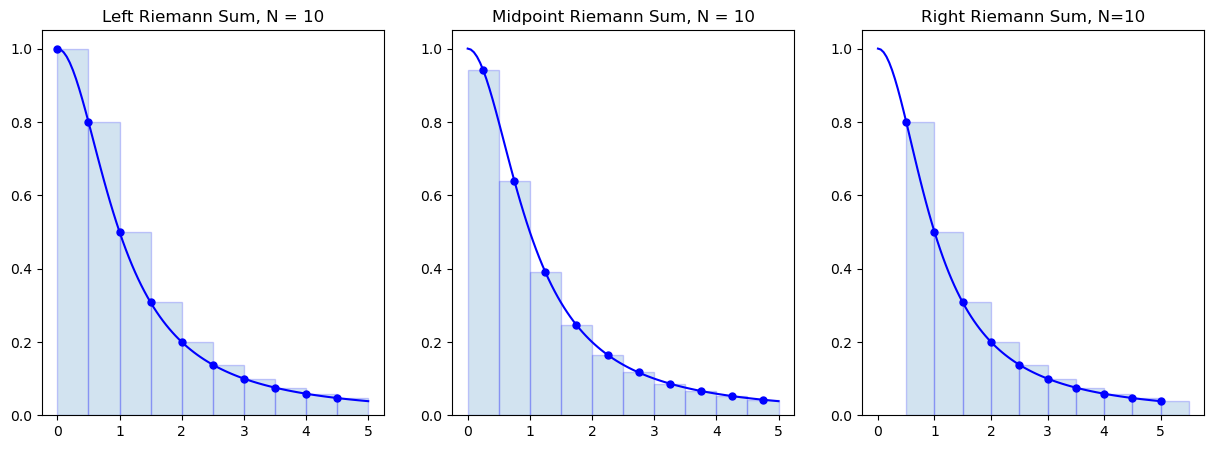

In [5]:
f = lambda x : 1/(1+x**2)
a = 0; b = 5; N = 10
n = 10  # Usen*N+1 points to plot the function smoothly

x = np.linspace(a, b, N+1)
y = f(x)

X = np.linspace(a, b, n*N+1)
Y = f(X)

plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
plt.plot(X, Y, 'b')
x_left = x[:-1] ; y_left = y[:-1]       #Left endpoints
plt.plot(x_left, y_left, 'b.', markersize = 10)
plt.bar(x_left, y_left, width=(b-a)/N, alpha=0.2, align='edge', edgecolor = 'b')
plt.title("Left Riemann Sum, N = {}".format(N))

plt.subplot(1, 3, 2)
plt.plot(X, Y, 'b')
x_mid = (x[:-1]+x[1:])/2 ; y_mid = f(x_mid)       #midpoints
plt.plot(x_mid, y_mid, 'b.', markersize = 10)
plt.bar(x_mid, y_mid, width=(b-a)/N, alpha=0.2, edgecolor='b')
plt.title("Midpoint Riemann Sum, N = {}".format(N))

plt.subplot(1, 3, 3)
plt.plot(X, Y, 'b')
x_right = x[1:] #Right endpoints
y_right = y[1:]
plt.plot(x_right, y_right, 'b.', markersize = 10)
plt.bar(x_right, y_right, width=(b-a)/N, alpha=0.2, align='edge', edgecolor='b')
plt.title("Right Riemann Sum, N={}".format(N))

plt.show()

Notice that when the function $f(x)$ is decreasing on $\left[a,b \right]$ the left endpoints give an overestimate of the integral $\int_{a}^{b}f(x)dx$ and right endpoints give an underestimate. The oppostite is true is when the function is increasing.

Let's compute the value of each of the Riemann sums:

In [7]:
dx = (b-a)/N
x_left = np.linspace(a, b-dx, N)
x_midpoint = np.linspace(dx/2, b-dx/2, N)
x_right = np.linspace(dx, b, N)

print("Partition with", N, "subintervals.")
left_riemann_sum = np.sum(f(x_left)*dx)
print("Left Riemann sum:", left_riemann_sum)
# print(x_left)

midpoint_riemann_sum = np.sum(f(x_midpoint) * dx)
print("Midpoint Riemann Sum:", midpoint_riemann_sum)
# print(x_midpoint)

right_riemann_sum = np.sum(f(x_right)*dx)
print("Right Riemann Sum:", right_riemann_sum)
# print(x_right)

Partition with 10 subintervals.
Left Riemann sum: 1.613488696614725
Midpoint Riemann Sum: 1.373543428316664
Right Riemann Sum: 1.1327194658454942


We know the exact value $$\int_{0}^{5} \frac{1}{1+x^{2}}dx = \arctan{5}$$ and we can compare the Riemann sums to the value

In [8]:
I = np.arctan(5)
print(I)

1.373400766945016


In [9]:
print("Left Riemann Sum Error:", np.abs(left_riemann_sum - I))
print("Midpoint Riemann Sum:", np.abs(midpoint_riemann_sum - I))
print("Right Riemann Sum:", np.abs(right_riemann_sum - I))


Left Riemann Sum Error: 0.24008792966970915
Midpoint Riemann Sum: 0.00014266137164820059
Right Riemann Sum: 0.24068130109952168


### Error Formulas
A Riemann sum is an approximation of a definite integral. A natural question arises: how good of an approximation is a Riemann sum?

**Theorem.** Let $L_{N}(f)$ denote the left Riemann sum $$L_{N}(f) = \sum_{i=1}^{N} f(x_{i-1})\Delta x$$
where $\Delta = (b-a)/N$ and $x_{i} = a+i\Delta x$. The error bound is $$E_{N}^{L} = \left| \int_{a}^{b} f(x)dx - L_{N}(f)\right| \leq \frac{\left(b-a\right)^{2}}{2N}K_{1}$$
where $\left|f^{\prime}(x)\right| \leq K_{1}$ for all $x \in \left[a,b\right]$.

**Theorem.** Let $R_{N}(f)$ denote the right Riemann sum $$R_{N}(f) = \sum_{i=1}^{N}f(x_{i})\Delta x$$
where $\Delta x = (b-a)/N$ and $x_{i} = a+i\Delta x$. The error bound is $$E_{N}^{R} = \left| \int_{a}^{b} f(x)dx - R_{N}(f)\right| \leq \frac{\left(b-a\right)^{2}}{2N}K_{1}$$
where $\left|f^{\prime}(x)\right| \leq K_{1}$ for all $x \in \left[a,b\right]$.

**Theorem.** Let $M_{N}(f)$ denote the midpoint Riemann sum $$ M_{N}(f) = \sum_{i=1}^{N}f(x_{i}^{*})\Delta x$$
where $\Delta x = (b-a)/N$ and $x_{i}^{*} = (x_{i-1}+x_{i})/2$ for $x_{i}=a+i \Delta x$. The error bound is 
$$E_{N}^{M} = \left| \int_{a}^{b} f(x)dx - M_{N}(f)\right| \leq \frac{\left(b-a\right)^{3}}{24N^{2}}K_{2}$$
where $\left|f^{\prime\prime} (x)\right| \leq K_{2} $ for all $x \in \left[a, b \right]$.



There are several points to notice:
* Left and right Riemann sums have the same error bound which depends on the first derivative $f^{\prime}$.
* Midpoint Riemann sum error bound depends on the second derivative $f^{\prime \prime}(x)$.
* We expect the midpoint Riemann sum to give a better approximation as $N \rightarrow \infty$ since its error bound is inversely propotional to $N^{2}$ but left/right riemann sum error bound is inversely proportional only to $N$.

### Implementation
Let's write a function called `riemann_sum` which takes 5 input parameters `f`, `a`, `b`, `N` and `method` and returns the Riemann sum $$\sum_{i=1}{N}f(x_{i}^{*})\Delta x$$
where $\Delta = (b-a)/N$ and $x_{i}= a+i\Delta x$ defines a partition with $N$ subintervals of equal length, and `method` determines whether we use left endpoints, right endpoints or midpoints(with midpoints as the default method).